In [28]:
import pandas as pd
churn_data = pd.read_csv('churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


###  Цель: установить, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов.


In [29]:
import plotly
import plotly.express as px
print(plotly.__version__)
# importing the required library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


5.3.1


In [30]:
plt.style.use('default')

# 9.1 ДИАГРАМА

------

Каково соотношение ушедших и лояльных клиентов? 
Покажите это на графике и дайте комментарий по соотношению.

Text(0.5, 1.0, 'Customer ratio')

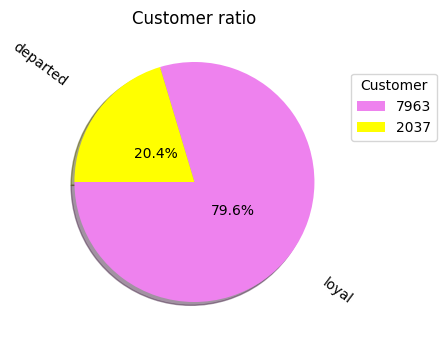

In [31]:
ratio = churn_data['Exited'].value_counts()
fig = plt.figure(figsize=(3, 7))

axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    ratio,
    labels=('loyal', 'departed'),
    shadow = True,
    colors = (['violet', 'yellow', ]),
    pctdistance = 0.4, #distance percents designation from the center of circle 
    labeldistance = 1.3, #distance label designation from the center of circle
    startangle = 180, #rotation by degrees just for fun
    rotatelabels = True, #rotation of labels just for fun
    autopct='%.1f%%',
    explode = [0, 0]
); 
axes.legend(ratio,
            title = 'Customer',
            loc = 'center left',
            bbox_to_anchor = (1, 0, 0.5, 1.5))
axes.set_title('Customer ratio')



##### Вывод: из 10000 в общей сумме банк покинули 2037(20.4%), остались клиентами банка 7963(79.6%) человек

# 9.2 ГИСТОГРАММА

------

Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

In [32]:
histogram_data = churn_data[churn_data['Balance']>2500]
fig = px.histogram(
    data_frame = histogram_data,
    x = 'Balance',
    height=300,
    width=700,
    title='Распределение баланса на счетах в банке (>2500$)',
)
fig.show()

##### Вывод: большая часть клиентов имеет на счету суммы в пределах 70-170 тысяч долларов. Один клиент не имеет на счету ни одного доллара, 250 тысяч - максимальная сумма на клиентском счету

# 9.3 Box Plots

------

Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

In [33]:
fig = px.box(
    data_frame = churn_data,
    x = 'Balance',
    color='Exited',
    height=300,
    width=700,
    title='Распределение баланса на счетах в банке по группам',
)
fig.show()

##### Вывод: Сумма баланса лояльных пользователей превышает в 3 раза баланс ушедших клиентов. Учитывая разницу в суммах клиентов, можно сказать, что услугами банка пользовались как дополнительными, при этом имея основной счет в другом банке на более выгодных условиях или используя преимущественно наличные деньги.

# 9.4 Линейный график

------

Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

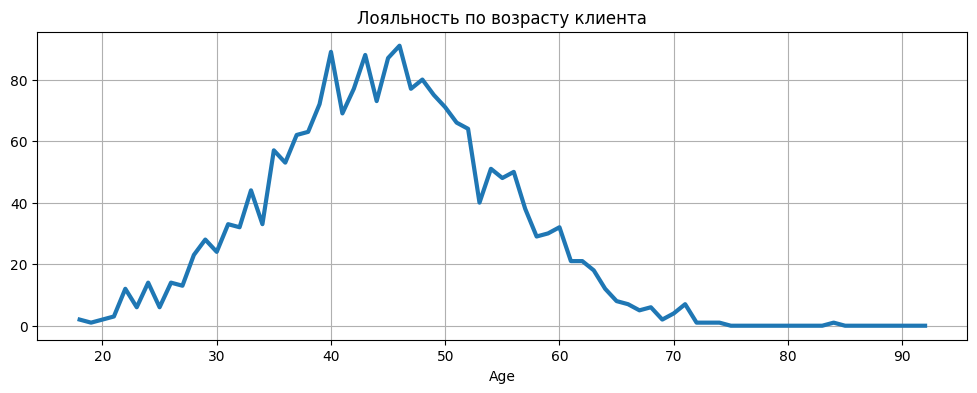

In [34]:
grouped_age = churn_data.groupby('Age')['Exited'].sum()
grouped_age.plot(
  kind='line',
  figsize=(12, 4),
  title='Лояльность по возрасту клиента',
  grid = True,
  lw=3
);

##### Вывод: наиболее лояльные клиенты это люди в возрасте 30-60 лет. Наименее лояяльные клиенты это люди  возрасте от 70 лет. Разброс клиентов соответствует нормальному распределению.По графику можно предположить, что основная часть клиентов, лояльных банку, это люди работоспособного возраста, которых устраивают услуги банка.Можно предположить, что в банке нет программ поддержки пенсионеров, из-за чего наблюдается спад лояльности клиентов зависимо к увеличению возраста клиентов 

# 9.5 Box Plots


------

Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты.Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это

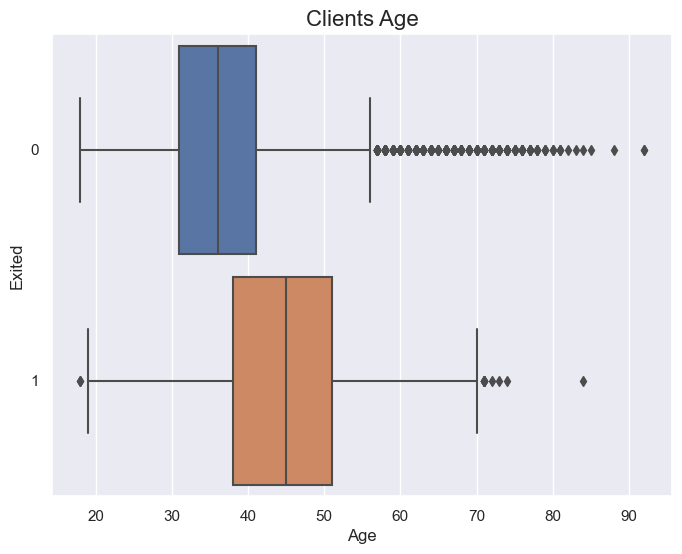

In [35]:
plt.figure(figsize=(8, 6))
sns.set_theme(style="darkgrid")
# construction of a box plot by exited clients
dx = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Age',
    orient='h',
    width=0.9,
)
# axle marking
dx.set_title('Clients Age', fontsize=16)
# display graph
plt.show()


#### Большое количество потенциальных выбросов находится в лояльной группе, причем это клиенты в возрасте от 57 до 92 лет, что говорит нам о незначительном количестве клиентов в возрастной группе от 55 лет и более.Стоит обратить внимание на группу в возрасте от 37 лет до 51 года, так как основная часть клиентов сосредоточена в данном возрасте находится в категории ушедших клиентов. Сравнивая с лояльными клиентами, получаем промежуток от 37 лет до 41 года,где заканчивается ящик с лояльными клиентами и начинается ящик с ушедшими, что говорит об определенном возрастном сдвиге в использовании услуг банка, который можно выразить фразой: "Популярно у молодежи, но не по нраву старшему поколению".Разработка программы лояльности должна быть рассчитана на привлечение возрастной группы от 37 лет до 51 года, для людей использующих преимущественно наличные средства ввиду небольшого баланса на счете в банке.

# 9.6 Диаграма

------

Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [36]:
px.pie(
data_frame = churn_data,
values = 'Exited',
names = 'Gender',
height = 300, 
width = 700,
title = 'sex correlation'
)

#### Вывод: женщины уходят на 11,% чаще мужчин. Можно предположить, что показатель лояльности не зависит от пола клиента. 

##  9.7 Столбчатая многоуровневая диаграма

------

Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [37]:
churn_data.loc[churn_data['Exited'] == 1, 'loyal'] = 'Not loyal'
churn_data.loc[churn_data['Exited'] == 0, 'loyal'] = 'Loyal'
# the number of non-blank values in the row_number column in each group
bar_data = churn_data.groupby(['NumOfProducts', 'loyal'], as_index=False).count()
# construction of layered bar chart
px.bar(
    data_frame=bar_data,
    x='NumOfProducts',
    y='RowNumber',
    color='loyal',
    height=400,
    width=600,
    title='Number of Purchased Bank Services'
)

##### Из диаграммы видно, что при наличии 3-х и более услуг у клиента, статус нелояльности к банку увеличивается и превалирует над лояльными клиентами. В категории клиентов, у которых 2-е услуги лояльных больше на 13,4%, чем в категории клиентов, у которых одна услуга, при этом существенное падение на 98,92% в категории 3-х услуг, и на 100% в категории 4-х услуг соответственно. Что говорит о низкой привлекательности банка как экосистемы продуктов, ввиду популярности использования 1-ой или 2-мя услугами из продуктовой линейки банка. Суммарное количество клиентов с одной услугой больше на 9,72% клиентов, чем с двумя услугами банка, но при этом количество не лояльных клиентов значительно больше на 75,3%. Тем самым получается, что самая привлекательная категория клиентов у банка, те кто пользуется двумя услугами, так как самый высокий процент лояльности в аудитории. Необходима программа по увеличению лояльности среди клиентов с одной услугой, для удержания клиентов в банке. И проработка дополнительных услуг, которые не являются привлекательными для аудитории.

##  9.8 

----------

Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?


In [39]:
churn_data.loc[churn_data['IsActiveMember'] == 1, 'Status'] = 'Active'
churn_data.loc[churn_data['IsActiveMember'] == 0, 'Status'] = 'Inactive'


activ = churn_data.groupby(['Status', 'loyal'], as_index=False).count()
# construction of layered bar chart
px.bar(
    data_frame=activ,
    x='Status',
    y='RowNumber',
    color='loyal',
    height=400,
    width=600,
    title='Active Client Status'
)

#### Вывод: Активных клиентов на 5,86% больше, чем не активных, получается что деление просходит примерно пополам. При этом активных, но не лояльных клиентов меньше на 43,54%, чем в категории не активных клиентов, что говорит нам о 83,35% лояльных и активных клиентах, остаток клиентов не является лояльным к банку. Неактивных, но лояльных клиентов в банке 63,3%, остальные не являются активными и лояльными. В группе клиентов, которая не является активной, но при этом лояльна необходимо выявить спект услуг, неиспользуемый клиентом или успользуемый в другом учереждении для привлечения.

## 9.9  Тепловая кардиограмма

----------


#### В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [42]:
mask2 = churn_data['Status'] == 'Inactive'
churn_df_mask2 = churn_data[mask2]
# counting the number of inactive clients
# and removing unnecessary columns
lost = churn_df_mask2.groupby(['Status', 'Geography'], as_index=False).count()
lost = lost.drop(['CreditScore', 'Gender', 'Age',
                  'Tenure', 'Balance', 'NumOfProducts',
                  'IsActiveMember', 'EstimatedSalary',
                  'Exited', 'loyal'], axis=1)
# building a heat cartogram
px.choropleth(
    data_frame=lost,
    locations="Geography",
    locationmode="country names",
    color="RowNumber",
    title='Share of Lost Customers',
    width=800,
    height=500
)

#### Вывод: Банк не пользуется популярность во Франции, причем количество неактивных клиентов сопоставимо с Испанией и Германией вместе взятыми, вполне возможно отток клиентов связан с изменением условий обслуживания на территории страны.

##  9.10

--------

Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

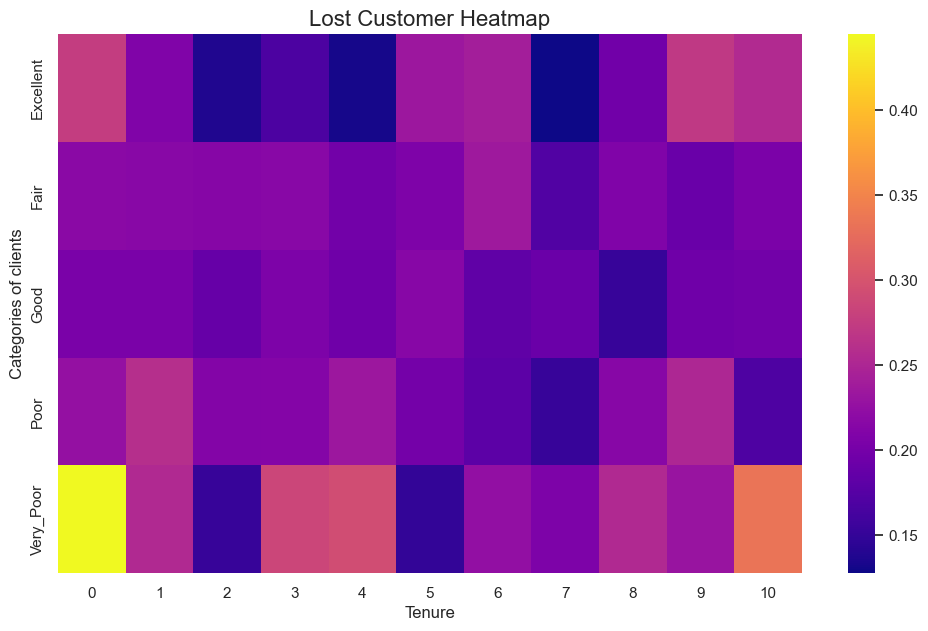

In [44]:
def get_credit_score_cat(credit_score):
    '''function for converting a numerical feature into a categorical one'''
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
# application of a function
credit_score = churn_data['CreditScore'].apply(get_credit_score_cat)
# creating a new column with
# a credit rating category attribute
churn_data['CreditScoreCat'] = credit_score
# building a pivot table
credit_cat = churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean',
    fill_value=0
)
# chart size
plt.figure(figsize=(12, 7))
# building a heatmap
heatmap = sns.heatmap(data=credit_cat, cmap='plasma')
# axle marking
heatmap.set_ylabel('Сategories of clients')
heatmap.set_title('Lost Customer Heatmap', fontsize=16)
# display graph
plt.show()

#### Вывод: Чаще всего — это клиенты с низким рейтингом, которые только начали пользоваться услугами, но по каким-то причинам не понравилось или доверие которых банк не заполучил. По тепловой карте видно, что чем выше категория клиентов, тем меньше потерь среди клиентов, но при этом высокое количество в категории "Превосходно". Так же можно обратить внимание на область использования услугами до 7-ми лет, преобладает холодный оттенок, что говорит о низком оттоке клиентов. В последующем происходит увеличение оттока клиентов, что требует разработки программы лояльности для клиентов с длительным сроком обслуживания.